**Data**: https://archive.ics.uci.edu/ml/datasets/eeg+database <br/>
Henri Begleiter<br/>
Neurodynamics Laboratory,<br/>
State University of New York Health Center<br/>
Brooklyn, New York<br/>

**Contributers:** <br/>
Nathan Bui<br/>
Ryan Bui<br/>

## **Data Explanation:** <br/>
The data contains measurements from 64 different electrodes on the scalp and they were sampled for a time period of one second. There were two groups: alcoholic and control. The subjects were also given stimuli during this time period. They were either shown one picture, two different pictures or two pictures that were the same. In our project, we focused on the data where the subjects were show two pictures that were identical. There were hundreds of files with different variations of stimuli. We decided to take 10 files where all subjects were alcoholic and they were given two identical pictures and 10 files where all subjects were control and they were given tone picture. A total of 20 files to create our models and make predictions. With our models, we want to be able to predict whether the subject was alcoholic or control based on the sensor values given.

Firstly, we read in the 20 files and stored them into one dataframe. There were multiple components to the data, but we would only want to use sensor position, sensor value, and subject identifier. We then discared the other components and formatted the data so that the columns would be filled with sensor values and represent a specific sensor position and the last column would be the subject identifier. Each row would represent a specific moment in time during that one second period. 

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

# Accessing first data file and displaying it within a dataframe so that we can analyze it
display(pd.read_csv("./Test/Data1.csv"))
df = pd.read_csv("./Test/Data1.csv")

# Header for dataframe is going to based on the unique sensor placements
header1 = df["sensor position"].unique()
header1 = np.append(header1, ["Alcoholic(a)/Control(c)"])
df_clean1 = pd.DataFrame(columns = header1)

# Read 20 different files where 10 are on the alcoholic group and the other 10 are on control groups
for file in range(10):
    # Data from alcoholic group
    df = pd.read_csv("./Test/Data"+ str(file + 1) +".csv")
    
    # header for temporary dataframe
    header_temp = df["sensor position"].unique()
    header_temp = np.append(header_temp, ["Alcoholic(a)/Control(c)"])
    df_temp = pd.DataFrame(columns = header1)
    
    # Load in data for each column based on header
    sensor_pos = df['sensor position'].unique()
    for sensor_name in sensor_pos:
        values = df.loc[df['sensor position'] == sensor_name]['sensor value'].to_numpy()
        df_temp[sensor_name] = values
    df_temp["Alcoholic(a)/Control(c)"] = df['subject identifier'].iloc[0] 
    df_clean1 = pd.concat([df_clean1, df_temp], ignore_index = True)
    
    #Data from control group
    df = pd.read_csv("./Test/Data"+ str(file + 241) +".csv")
    
    # header for temporary dataframe
    header_temp = df["sensor position"].unique()
    header_temp = np.append(header_temp, ["Alcoholic(a)/Control(c)"])
    df_temp = pd.DataFrame(columns = header1)
    
    # Load in data for each column based on header
    sensor_pos = df['sensor position'].unique()
    for sensor_name in sensor_pos:
        values = df.loc[df['sensor position'] == sensor_name]['sensor value'].to_numpy()
        df_temp[sensor_name] = values
    df_temp["Alcoholic(a)/Control(c)"] = df['subject identifier'].iloc[0] 
    df_clean1 = pd.concat([df_clean1, df_temp], ignore_index = True)
    
display(df_clean1)

#Check the counts of control and alcoholic
print(df_clean1["Alcoholic(a)/Control(c)"].value_counts())


,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,30,FP1,0,-3.550,a,S1 obj,0,co2a0000364,0.000000
1,6,30,FP1,1,-5.015,a,S1 obj,0,co2a0000364,0.003906
2,7,30,FP1,2,-5.503,a,S1 obj,0,co2a0000364,0.007812
3,8,30,FP1,3,-3.550,a,S1 obj,0,co2a0000364,0.011719
4,9,30,FP1,4,-0.621,a,S1 obj,0,co2a0000364,0.015625
...,...,...,...,...,...,...,...,...,...,...
16379,16447,30,Y,251,1.007,a,S1 obj,63,co2a0000364,0.980469
16380,16448,30,Y,252,3.937,a,S1 obj,63,co2a0000364,0.984375
16381,16449,30,Y,253,3.937,a,S1 obj,63,co2a0000364,0.988281
16382,16450,30,Y,254,2.472,a,S1 obj,63,co2a0000364,0.992188


,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,...,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y,Alcoholic(a)/Control(c)
0,-3.55,-4.476,-1.017,-0.661,-6.083,-7.64,-4.313,-1.2,-7.507,-2.319,...,-7.09,-3.011,-0.6,-2.625,0.824,2.604,1.79,-3.56,-5.341,a
1,-5.015,-3.499,-3.947,5.198,-4.618,-9.593,-2.848,1.241,-5.066,-0.366,...,1.211,-2.523,-0.112,-2.625,1.312,2.116,1.302,-4.537,-5.341,a
2,-5.503,-1.058,-5.9,10.569,-2.177,-7.151,-0.407,2.706,-0.671,1.587,...,4.14,-1.058,-0.6,-2.625,0.824,0.651,0.326,-5.025,-4.364,a
3,-3.55,1.383,-4.924,13.987,1.241,0.173,1.058,3.682,1.77,3.052,...,12.441,0.407,-1.577,-3.113,0.336,-2.279,-0.651,-3.56,-3.876,a
4,-0.621,3.337,-2.97,13.499,2.706,8.962,1.546,3.682,1.282,3.54,...,-1.231,0.407,-2.553,-3.113,-0.153,-3.743,-1.139,-0.631,-3.876,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,-3.001,-1.74,-3.469,1.862,-5.32,-0.275,-2.818,0.946,-6.297,4.283,...,-17.731,-2.869,-7.192,-11.658,-9.196,-5.473,-0.651,-2.625,-20.508,c
5116,-1.536,-1.251,-1.516,5.28,-3.367,-0.275,-1.841,0.946,-2.879,4.771,...,-25.543,-2.869,-6.215,-11.658,-8.708,-4.985,-0.163,-1.648,-18.555,c
5117,-2.024,-2.716,-4.445,2.838,-2.391,-1.251,-1.841,-0.031,-0.437,3.794,...,-30.426,-2.38,-5.727,-12.146,-7.731,-4.985,-0.651,-2.136,-18.066,c
5118,-5.442,-6.134,-8.84,-3.998,-3.855,-3.204,-2.33,-1.007,-0.437,0.865,...,-30.426,-1.404,-6.704,-14.099,-7.731,-6.449,-0.651,-5.066,-19.531,c


a    2560
c    2560
Name: Alcoholic(a)/Control(c), dtype: int64


# **Exploratory Data Analysis**

First, we describe the dataset to check the counts.

In [140]:
df_clean1.describe()

,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,...,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y,Alcoholic(a)/Control(c)
count,5120.000,5120.000,5120.000,5120.000,5120.000,5120.000,5120.000,5120.000,5120.000,5120.000,...,5120.000,5120.000,5120.000,5120.000,5120.000,5120.000,5120.000,5120.000,5120.00,5120
unique,1211.000,1301.000,1204.000,1382.000,837.000,1021.000,795.000,788.000,963.000,1003.000,...,1296.000,472.000,921.000,1073.000,776.000,701.000,383.000,1263.000,1076.00,2
top,-0.437,2.319,-6.663,-8.881,6.612,-3.204,-0.641,0.092,-1.902,-0.549,...,-5.941,-3.001,-1.973,-5.615,0.356,-2.055,0.234,6.694,-5.92,a
freq,24.000,21.000,20.000,21.000,27.000,29.000,50.000,29.000,36.000,23.000,...,21.000,43.000,27.000,25.000,47.000,40.000,79.000,24.000,31.00,2560


Then, we check if the dataset contains any NA values.

In [141]:
df_clean1.isna().sum()

FP1                        0
FP2                        0
F7                         0
F8                         0
AF1                        0
                          ..
P1                         0
CPZ                        0
nd                         0
Y                          0
Alcoholic(a)/Control(c)    0
Length: 65, dtype: int64

Because of the way our data is setup, to analyze the data we'll split up the groups into two separate dataframes. 

In [142]:
df_alcoholic = df_clean1.loc[df_clean1['Alcoholic(a)/Control(c)'] == 'a']
df_control = df_clean1.loc[df_clean1['Alcoholic(a)/Control(c)'] == 'c']
df_alcoholic = df_alcoholic.drop('Alcoholic(a)/Control(c)', axis=1)
df_control = df_control.drop('Alcoholic(a)/Control(c)', axis=1)

Get the average sensor values for each sensor.

In [143]:
df_control_avgs = pd.DataFrame({'mean':df_control.mean(axis=0)}).reset_index()
df_alcoholic_avgs = pd.DataFrame({'mean':df_alcoholic.mean(axis=0)}).reset_index()

Plot a bar graph to display the average sensor values.

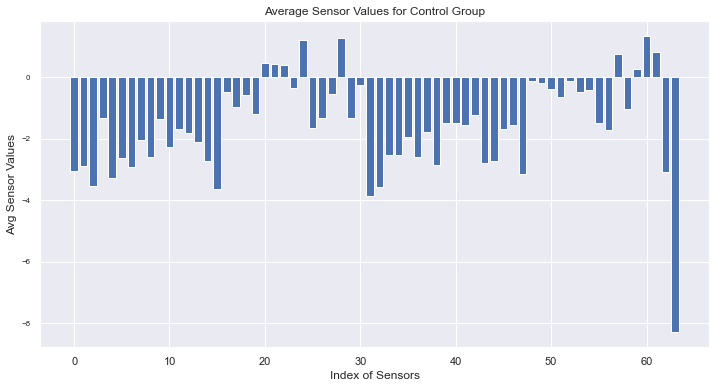

In [144]:
plt.figure(figsize = (12, 6))
plt.bar(df_control_avgs.index, df_control_avgs['mean'])
plt.title('Average Sensor Values for Control Group')
plt.xlabel('Index of Sensors')
plt.ylabel('Avg Sensor Values')
plt.show()

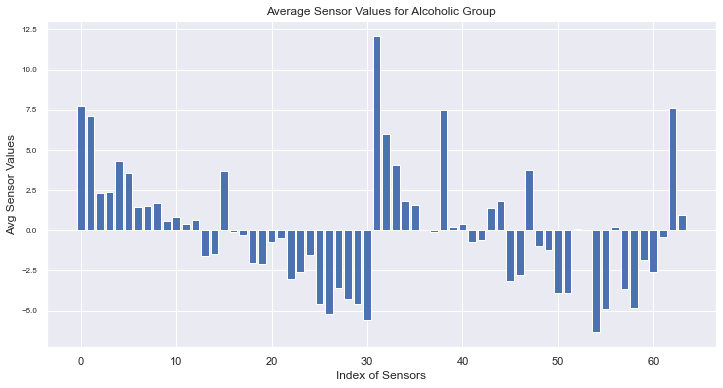

In [145]:
plt.figure(figsize = (12, 6))
plt.bar(df_alcoholic_avgs.index, df_alcoholic_avgs['mean'])
plt.title('Average Sensor Values for Alcoholic Group')
plt.xlabel('Index of Sensors')
plt.ylabel('Avg Sensor Values')
plt.show()

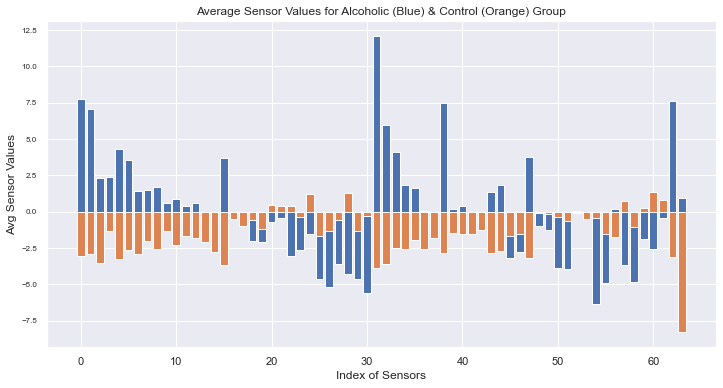

In [146]:
plt.figure(figsize = (12, 6))
plt.bar(df_alcoholic_avgs.index, df_alcoholic_avgs['mean'])
plt.bar(df_control_avgs.index, df_control_avgs['mean'])
plt.title('Average Sensor Values for Alcoholic (Blue) & Control (Orange) Group')
plt.xlabel('Index of Sensors')
plt.ylabel('Avg Sensor Values')
plt.show()

# **Data Columns represented as Sensors**

In [147]:
#Shuffle the data
df_shuffle = df_clean1.sample(frac=1).reset_index(drop=True)

#Features
X = df_shuffle.drop("Alcoholic(a)/Control(c)", axis=1)
display(X)

#Target
y = df_shuffle["Alcoholic(a)/Control(c)"]
display(y)

,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,...,PO7,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y
0,6.632,2.604,3.204,-2.808,4.659,6.632,2.665,3.194,2.899,-0.326,...,-21.444,-12.767,0.997,-3.072,-3.123,-0.234,-1.851,-0.478,7.08,2.787
1,3.092,5.676,2.614,2.35,3.591,2.767,3.347,0.936,1.648,10.661,...,-7.589,-9.257,3.56,-12.594,-16.205,-12.309,-9.644,-1.719,3.754,2.767
2,-0.682,0.875,2.126,1.658,3.55,2.035,0.631,1.292,4.272,-5.605,...,-5.035,-13.184,0.346,-0.031,-3.387,5.707,2.645,1.933,0.092,-4.506
3,-15.574,-13.387,-12.543,-14.13,-9.043,-9.45,-4.527,-8.148,-5.025,-6.022,...,2.167,-2.38,-0.254,-11.434,-12.227,-5.259,-6.938,-4.089,-15.615,-22.186
4,2.391,10.518,-4.557,12.767,0.417,8.708,0.01,5.259,0.437,6.012,...,-21.23,0.498,-0.071,1.434,0.559,1.892,-1.333,1.211,2.787,-6.236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,-6.053,-4.008,-4.71,0.682,-3.286,-1.383,1.119,0.315,-1.099,1.719,...,-10.895,-9.277,1.811,7.782,4.425,4.242,5.086,1.444,-5.768,-7.924
5116,-16.724,-12.848,-28.727,-11.098,-12.522,-12.309,-8.789,-10.579,-3.906,-11.23,...,-1.526,-11.912,-6.022,-6.368,-12.492,-7.263,-1.994,1.312,-16.113,-28.015
5117,-0.875,-6.47,-3.194,5.839,-1.221,2.655,0.732,-0.285,-0.559,-0.549,...,-0.153,-11.149,2.37,-6.592,-9.776,-4.038,-5.259,-1.353,-0.519,-1.851
5118,38.259,32.644,13.794,23.366,21.322,22.614,8.158,8.972,11.281,11.129,...,2.716,5.208,2.157,-0.712,0.01,1.251,-0.478,-0.244,37.099,16.225


0       a
1       c
2       c
3       c
4       a
       ..
5115    c
5116    c
5117    a
5118    a
5119    c
Name: Alcoholic(a)/Control(c), Length: 5120, dtype: object

For all our data, when we created models, we would do a 80/20 split for our training and test data.

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Random Forest Classification**

In [149]:
# Create model and check accuracy and precision of predictions for Random Forest Classification
rf_model = RandomForestClassifier(n_estimators = 1000)
rf_model.fit(X_train, y_train)
target_pred = rf_model.predict(X_test)
print("Random Forest Classifier Accuracy:", metrics.accuracy_score(y_test, target_pred))
print("Random Forest Classifier Precision:", metrics.precision_score(y_test, target_pred, pos_label = 'a'))

Random Forest Classifier Accuracy: 0.9853515625
Random Forest Classifier Precision: 0.9919517102615694


The results of the accuracy and precision were high. Next, we wanted to see which sensors were influencing the model the most.

Y      0.084287
FC6    0.072568
P2     0.056099
X      0.043360
C2     0.039297
PO1    0.038546
C6     0.029791
CZ     0.029744
CP2    0.028437
FC4    0.027384
FC2    0.027219
PZ     0.022824
P8     0.019547
AF7    0.019252
nd     0.018752
P1     0.017896
FP1    0.017272
P3     0.017048
O1     0.016722
CPZ    0.016714
FC1    0.014660
AFZ    0.014569
FC5    0.013503
FPZ    0.013066
POZ    0.011267
P6     0.010875
CP1    0.010602
FCZ    0.010343
FT8    0.010313
P7     0.010283
PO2    0.010103
P5     0.009880
CP5    0.009238
FP2    0.009157
AF1    0.008719
P4     0.008572
CP4    0.008443
F7     0.008378
PO7    0.008330
FT7    0.008124
F8     0.007992
OZ     0.007777
PO8    0.007577
C4     0.007321
CP6    0.007107
C3     0.007062
O2     0.007025
F2     0.006938
FC3    0.006835
AF8    0.006503
TP8    0.006420
TP7    0.006395
FZ     0.006377
F1     0.006224
CP3    0.006177
AF2    0.006165
F4     0.006056
F3     0.005666
F6     0.005662
C1     0.005213
C5     0.004276
T8     0.004154
T7     0

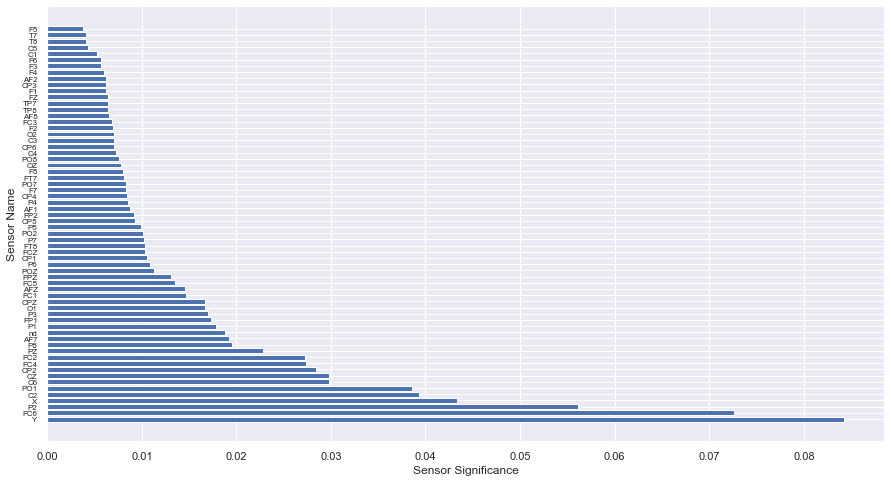

In [150]:
#Check which sensors have the most significant impact in the model to predict the target values
sensor_significance = pd.Series(rf_model.feature_importances_, index = sensor_pos).sort_values(ascending=False)
print(sensor_significance.to_string())
plt.barh(sensor_significance.index, sensor_significance)
plt.xlabel("Sensor Significance")
plt.ylabel("Sensor Name")
plt.rc('ytick', labelsize = 8)


## **SVC Classification**

In [151]:
# Create model and check accuracy and precision of predictions for SVC Classification
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("SVC Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("SVC Precision:", metrics.precision_score(y_test, y_pred, pos_label="a"))

SVC Accuracy: 0.908203125
SVC Precision: 0.9133064516129032


The SVM classification had lower accuracy and precision when compared to the Random Forest Classification, but it was still relatively high.

## **LDA Transform to Random Forest Classification**

In [152]:
# Create model and check accuracy and precision of predictions for LDA Transform to Random Forest Classification
LDA_model = LinearDiscriminantAnalysis()
X_LDA_train = LDA_model.fit_transform(X_train, y_train)
X_LDA_test = LDA_model.transform(X_test)
rf_LDA_model = RandomForestClassifier(n_estimators = 1000)
rf_LDA_model.fit(X_LDA_train, y_train)
y_pred = rf_LDA_model.predict(X_LDA_test)
print("LDA Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("LDA Precision:", metrics.precision_score(y_test, y_pred, pos_label="a"))

LDA Accuracy: 0.845703125
LDA Precision: 0.825187969924812


We also tested to see how the results would be influenced by doing a LDA transform onto the data and then doing a Random Forest Classification. The accuracy and precision were decreased by a decent amount.

Next, we wanted to test if we could get similar results by just using the top ten sensor positions that influenced the random forest model the most.

# **Dataframe with only Top 10 Significant Sensors**

In [153]:
# Create a dataframe with the top ten significant sensors
data_10 = {'Y': df_shuffle['Y'], 'FC6': df_shuffle['FC6'], 'P2': df_shuffle['P2'], 'C2': df_shuffle['C2'], 'PO1': df_shuffle['PO1'], 'X': df_shuffle['X'], 'C6': df_shuffle['C6'], 'FC4': df_shuffle['FC4'], 'CZ': df_shuffle['CZ'], 'PZ': df_shuffle['PZ']}
df_10 = pd.DataFrame(data = data_10)

X_train, X_test, y_train, y_test = train_test_split(df_10, y, test_size=0.2, random_state=42)

## **Random Forest Classification**

In [154]:
# Create model and check accuracy of predictions for Random Forest Classification
rf_model = RandomForestClassifier(n_estimators = 1000)
rf_model.fit(X_train, y_train)
target_pred = rf_model.predict(X_test)
print("Random Forest Classifier Accuracy:", metrics.accuracy_score(y_test, target_pred))
print("Random Forest Classifier Precision:", metrics.precision_score(y_test, target_pred, pos_label = 'a'))

Random Forest Classifier Accuracy: 0.9677734375
Random Forest Classifier Precision: 0.9700598802395209


The results for the random forest classifier was very similar to when we used the entirety of the data.

## **SVC Classification**

In [155]:
# Create model and check accuracy and precision of predictions for SVC Classification
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("SVC Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("SVc Precision:", metrics.precision_score(y_test, y_pred, pos_label="a"))

SVC Accuracy: 0.8291015625
SVc Precision: 0.8097928436911488


Howeever, the LDA Transform and the SVM Classification results decreased by around .10 for each value.

## **LDA Transform to Random Forest Classification**

In [156]:
# Create model and check accuracy and precision of predictions for LDA Transform to Random Forest Classification
LDA_model = LinearDiscriminantAnalysis()
X_LDA_train = LDA_model.fit_transform(X_train, y_train)
X_LDA_test = LDA_model.transform(X_test)
rf_LDA_model = RandomForestClassifier(n_estimators = 1000)
rf_LDA_model.fit(X_LDA_train, y_train)
y_pred = rf_LDA_model.predict(X_LDA_test)
print("LDA Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("LDA Precision:", metrics.precision_score(y_test, y_pred, pos_label="a"))

LDA Accuracy: 0.705078125
LDA Precision: 0.6884328358208955


Finally, we created models where we based the columns on different points of time rather than sensors.

# **Data Columns represented as Points in Time**

In [157]:
header = []

#Create headers that represent each point in time
for num in range(256):
    header.append('T'+str(num))
header.append('SensorPos')
header.append('Alcoholic/Control')
df_clean = pd.DataFrame(columns = header)

# Read 20 different files where 10 are on the alcoholic group and the other 10 are on control groups
for file in range(10):
    
    df = pd.read_csv("./Test/Data"+ str(file + 1) +".csv")
    sensor_pos = df['sensor position'].unique()
    
    sensor_num = 0
    
    #Fill in dataframe based on header
    for sensor_name in sensor_pos:
        sensor_num = sensor_num + 1
        values = df.loc[df['sensor position'] == sensor_name]['sensor value'].to_numpy()
        values = np.append(values, [sensor_num, df.iloc[0]['subject identifier']])
        df_clean.loc[len(df_clean.index)] = values
    
    df = pd.read_csv("./Test/Data"+ str(file + 241) +".csv")
    sensor_pos = df['sensor position'].unique()
    
    sensor_num = 0
    
    #Fill in dataframe based on header
    for sensor_name in sensor_pos:
        sensor_num = sensor_num + 1
        values = df.loc[df['sensor position'] == sensor_name]['sensor value'].to_numpy()
        values = np.append(values, [sensor_num, df.iloc[0]['subject identifier']])
        df_clean.loc[len(df_clean.index)] = values
    
display(df_clean)

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T248,T249,T250,T251,T252,T253,T254,T255,SensorPos,Alcoholic/Control
0,-3.55,-5.015,-5.503,-3.55,-0.621,1.821,2.309,0.844,0.844,3.286,...,3.774,4.751,6.215,6.215,4.751,1.333,-1.109,0.356,1,a
1,-4.476,-3.499,-1.058,1.383,3.337,2.848,2.36,2.848,4.801,7.731,...,-2.523,-4.476,-0.57,5.778,10.173,9.684,5.778,2.36,2,a
2,-1.017,-3.947,-5.9,-4.924,-2.97,-1.994,-1.994,-2.97,-1.017,4.354,...,-0.529,-1.994,-0.529,1.424,0.936,-2.97,-5.9,-6.388,3,a
3,-0.661,5.198,10.569,13.987,13.499,9.593,4.222,1.292,1.78,5.198,...,-2.614,-7.985,-7.985,-3.591,1.78,3.733,2.268,0.315,4,a
4,-6.083,-4.618,-2.177,1.241,2.706,2.706,1.729,1.241,2.218,4.659,...,-0.712,0.264,1.241,1.729,0.264,-1.689,-2.177,-0.224,5,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,6.917,10.824,13.265,14.242,14.242,14.242,14.73,15.218,15.218,14.242,...,-9.196,-9.684,-9.684,-9.196,-8.708,-7.731,-7.731,-7.731,60,c
1276,0.387,6.246,11.129,14.058,15.035,16.012,16.5,16.988,16.988,16.5,...,-5.473,-6.449,-5.961,-5.473,-4.985,-4.985,-6.449,-8.403,61,c
1277,1.302,2.767,3.743,3.743,3.743,3.255,3.743,4.232,4.72,4.72,...,-0.651,-0.651,-0.651,-0.651,-0.163,-0.651,-0.651,-1.139,62,c
1278,0.793,2.258,-0.183,-4.089,-7.996,-8.972,-8.484,-7.996,-8.972,-11.414,...,-8.484,-7.507,-5.066,-2.625,-1.648,-2.136,-5.066,-9.46,63,c


In [158]:
df_clean['Alcoholic/Control'].value_counts()

a    640
c    640
Name: Alcoholic/Control, dtype: int64

In [159]:
#Shuffle data
df_shuffle = df_clean.sample(frac=1).reset_index(drop=True)
display(df_shuffle)

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T248,T249,T250,T251,T252,T253,T254,T255,SensorPos,Alcoholic/Control
0,-2.218,-1.241,-1.241,-1.729,-2.706,-2.218,-1.729,0.224,2.177,3.642,...,-11.007,-8.565,-6.612,-5.636,-4.659,-3.194,-2.706,-2.706,28,a
1,0.814,-1.628,-3.092,-3.092,-1.139,0.814,2.767,4.232,5.697,6.673,...,26.693,24.74,22.786,21.322,20.833,20.345,21.322,21.81,5,a
2,-6.337,-7.802,-6.826,-3.896,-0.478,1.475,2.452,2.94,3.428,4.893,...,6.358,5.87,6.846,9.288,11.729,13.682,15.147,15.147,29,c
3,-3.479,-1.526,0.916,2.869,3.357,2.869,2.38,1.892,1.892,1.892,...,5.798,5.31,3.357,0.916,-0.549,0.427,2.869,5.31,45,a
4,2.574,-0.356,-0.356,5.015,5.015,8.433,-1.821,10.386,1.597,3.062,...,-2.309,3.062,2.085,0.621,5.992,2.085,1.597,5.015,56,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,-12.929,-15.371,-11.953,-5.605,-0.234,2.696,3.184,3.672,4.649,6.114,...,-8.535,-3.652,1.231,2.696,2.207,1.231,1.719,2.696,33,c
1276,-0.183,-2.136,-3.113,-2.625,-1.648,-0.671,-0.183,0.305,1.282,2.747,...,1.282,0.793,-0.183,-0.671,-1.16,-1.16,-0.671,-0.183,50,a
1277,3.662,2.197,-1.709,-5.615,-6.104,-5.127,-4.639,-5.127,-2.197,-9.521,...,-5.615,-3.662,-10.498,-8.545,0.732,1.221,-5.127,-2.197,54,c
1278,3.296,-0.122,-2.563,-3.052,-2.075,-0.61,0.854,1.343,0.854,0.854,...,6.714,5.737,-0.61,-7.446,-8.911,-3.052,3.784,4.761,40,c


In [160]:
# Components
X = df_shuffle.drop('Alcoholic/Control', axis=1)
display(X)

#Target
y = df_shuffle['Alcoholic/Control']
display(y)

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T247,T248,T249,T250,T251,T252,T253,T254,T255,SensorPos
0,-2.218,-1.241,-1.241,-1.729,-2.706,-2.218,-1.729,0.224,2.177,3.642,...,-12.96,-11.007,-8.565,-6.612,-5.636,-4.659,-3.194,-2.706,-2.706,28
1,0.814,-1.628,-3.092,-3.092,-1.139,0.814,2.767,4.232,5.697,6.673,...,28.646,26.693,24.74,22.786,21.322,20.833,20.345,21.322,21.81,5
2,-6.337,-7.802,-6.826,-3.896,-0.478,1.475,2.452,2.94,3.428,4.893,...,7.823,6.358,5.87,6.846,9.288,11.729,13.682,15.147,15.147,29
3,-3.479,-1.526,0.916,2.869,3.357,2.869,2.38,1.892,1.892,1.892,...,4.822,5.798,5.31,3.357,0.916,-0.549,0.427,2.869,5.31,45
4,2.574,-0.356,-0.356,5.015,5.015,8.433,-1.821,10.386,1.597,3.062,...,-0.844,-2.309,3.062,2.085,0.621,5.992,2.085,1.597,5.015,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,-12.929,-15.371,-11.953,-5.605,-0.234,2.696,3.184,3.672,4.649,6.114,...,-9.511,-8.535,-3.652,1.231,2.696,2.207,1.231,1.719,2.696,33
1276,-0.183,-2.136,-3.113,-2.625,-1.648,-0.671,-0.183,0.305,1.282,2.747,...,2.747,1.282,0.793,-0.183,-0.671,-1.16,-1.16,-0.671,-0.183,50
1277,3.662,2.197,-1.709,-5.615,-6.104,-5.127,-4.639,-5.127,-2.197,-9.521,...,-6.104,-5.615,-3.662,-10.498,-8.545,0.732,1.221,-5.127,-2.197,54
1278,3.296,-0.122,-2.563,-3.052,-2.075,-0.61,0.854,1.343,0.854,0.854,...,4.272,6.714,5.737,-0.61,-7.446,-8.911,-3.052,3.784,4.761,40


0       a
1       a
2       c
3       a
4       a
       ..
1275    c
1276    a
1277    c
1278    c
1279    c
Name: Alcoholic/Control, Length: 1280, dtype: object

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Overall, the results were worse than when we used sensor positions as the columns for the dataframe.

## **Random Forest Classification**

In [162]:
# Create model and check accuracy of predictions for Random Forest Classification
rf_model = RandomForestClassifier(n_estimators = 1000)
rf_model.fit(X_train, y_train)
target_pred = rf_model.predict(X_test)
print("Random Forest Classifier Accuracy:", metrics.accuracy_score(y_test, target_pred))
print("Random Forest Classifier Precision:", metrics.precision_score(y_test, target_pred, pos_label = 'a'))

Random Forest Classifier Accuracy: 0.90625
Random Forest Classifier Precision: 0.9083969465648855


T67          0.020302
T122         0.015670
T66          0.015497
T68          0.014717
T7           0.013997
               ...   
T167         0.001598
T138         0.001469
SensorPos    0.001463
T187         0.001378
T186         0.001333
Length: 257, dtype: float64


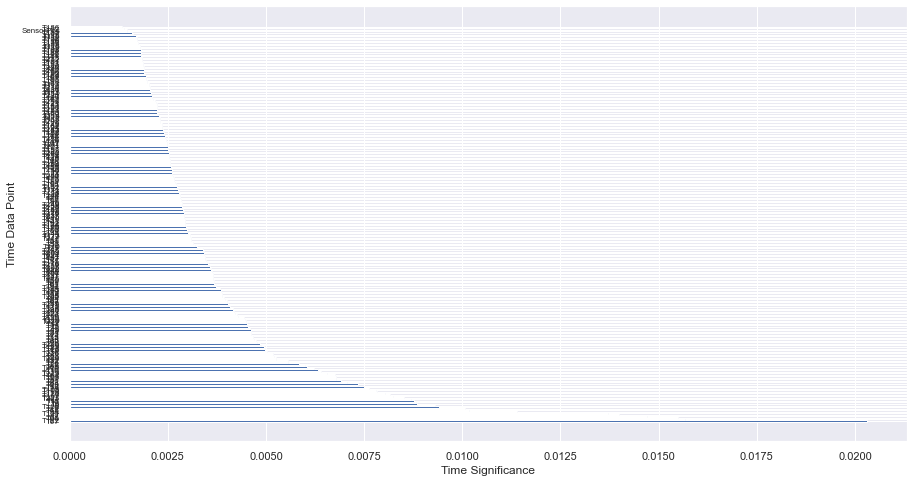

In [164]:
#Check which sensors have the most significant impact in the model to predict the target values 
header.pop()
sensor_significance = pd.Series(rf_model.feature_importances_, index = header).sort_values(ascending=False)
print(sensor_significance)
plt.barh(sensor_significance.index, sensor_significance)
plt.xlabel("Time Significance")
plt.ylabel("Time Data Point")
plt.rc('ytick', labelsize = 1)

## **SVC Classification**

In [165]:
# Create model and check accuracy and precision of predictions for SVC Classification
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("SVC Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("SVC Precision:", metrics.precision_score(y_test, y_pred, pos_label="a"))

SVC Accuracy: 0.80078125
SVC Precision: 0.8076923076923077


## **LDA Transform to Random Forest Classification**

In [166]:
# Create model and check accuracy and precision of predictions for LDA Transform to Random Forest Classification
LDA_model = LinearDiscriminantAnalysis()
X_LDA_train = LDA_model.fit_transform(X_train, y_train)
X_LDA_test = LDA_model.transform(X_test)
rf_LDA_model = RandomForestClassifier(n_estimators = 1000)
rf_LDA_model.fit(X_LDA_train, y_train)
y_pred = rf_LDA_model.predict(X_LDA_test)
print("LDA Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("LDA Precision:", metrics.precision_score(y_test, y_pred, pos_label="a"))

LDA Accuracy: 0.7890625
LDA Precision: 0.7984496124031008


In conclusion, the best model we ended up with was made through the Random Forest Classification using sensor positions as features to predict the target variable. We tested various ways to see if we could influence the accuracy and precision through data manipulation and isolation, but other methods couldn't surpass the best model.